In [4]:
import pandas as pd
import numpy as np
import random 
import statistics 
import timeit
import math

import matplotlib.pyplot as plt

In [5]:
def  sensitivity_idle(N, arrival_rate, gamma, termination, servicerate):
    # Setting paramters
    TNOW = 0
    TotalP = 0
    Total = 0
    AreaQ = 0
    AreaP_ = 0
    AreaP = 0
    # Average queue 
    Queue = 0 
    free_servers = []
    # Abandonment rate
    Abandon = 0
    Q_num = 0
    N_served = 0
    # PLotting Parameters for experiment 
    Waiting_number_Served = 0
    Waiting_number_Left = 0
    Waiting_Time_Left = 0
    Waiting_Time_Served = 0

    Server_idle = {}
    
    # Waiting time performance measure 
    Arrival_times = {}
    
    # Setting up the event Calendar 
    col_name = ["Arrivals", "Termination"]

    for i in range(0, N): 
        col_name += ["Server_"+str(i)]
        free_servers += ["Server_"+str(i)]        
    
    # Initializing the event calendar 
    event_calendar = { c : termination+1 for c in col_name}
    event_calendar["Arrivals"] = random.expovariate(arrival_rate)
    event_calendar["Termination"] = termination

 
    # Initialize Record keeping of utilization rates 
    Total_Utilization =  { s : 0 for s in free_servers}
    idle =  { s : 0 for s in free_servers}
    Server_idle = { s : 1 for s in free_servers} 
    
    while TNOW < termination:     
        
        TLast = TNOW
        Next_Event = min(event_calendar.keys(), key = (lambda k: event_calendar[k]))
        TNOW = event_calendar[Next_Event]
        
        
        for elements in idle:
            idle[elements] += (TNOW - TLast)*Server_idle[elements]
            
        if TNOW >= termination: 
            AreaQ += Queue*(termination - TLast)
            AreaP_ += (TotalP)*(termination - TLast)
            if TotalP >  0:
                AreaP += (Queue/TotalP)*(termination - TLast)

        else:
            AreaQ += Queue*(TNOW - TLast)
            AreaP_ += (TotalP)*(TNOW - TLast)
            if TotalP >  0:
                AreaP += (Queue/TotalP)*(TNOW - TLast)
        
            
        
        if Next_Event == 'Arrivals':  
            Total +=1
            event_calendar["Arrivals"] += random.expovariate(arrival_rate)
            # Assign a queue to check if servers are free
            TotalP += 1
            if free_servers == []:
                Queue += 1
                Q_num += 1 
                Arrival_times[str(Q_num)] = TNOW
                event_calendar["Departure_" + str(Q_num)] = TNOW + random.expovariate(gamma)
            else:
         
                li = []
                for elements in free_servers:
                    li.append(idle[elements])
                
                lowestwork = max(li) 
                res = [key for key in free_servers if idle[key] == lowestwork] 
                
                if len(res) > 1:
                    s = random.choice(res)
                else:
                    s = res[0]
                
                N_served +=1
                free_servers.remove(s)
                event_calendar[s] = TNOW + random.expovariate(servicerate[s])
                Server_idle[s] = 0
                
                # Only schedule the next service if TNOW < termination
                if TNOW < termination:
                    if event_calendar[s] < termination:
                        Total_Utilization[s] += event_calendar[s] - TNOW      
                    else:
                        Total_Utilization[s] += termination - TNOW 
              
        
        elif (Next_Event).startswith("Server") == True:
            ## Reset the value for the corresponding agent that is now free 
            TotalP -= 1
            event_calendar[Next_Event] = termination + 1 
            free_servers.append(Next_Event)
            Server_idle[Next_Event] = 1
            
             # Schedule the next service time once a server is available 
            if Queue > 0 and free_servers != []:
                N_served +=1
                li = []
                for elements in free_servers:
                    li.append(idle[elements])
    
                lowestwork = max(li) 
                res = [key for key in free_servers if idle[key] == lowestwork] 

                if len(res) > 1:
                    s = random.choice(res)
                else:
                    s = res[0]
                    
                Queue -= 1 
                free_servers.remove(s)
                event_calendar[s] = TNOW + random.expovariate(servicerate[s])
                Server_idle[s] = 0
                   
                # First come first serve basis
                del event_calendar[list(event_calendar)[N+2]]

                if TNOW < termination:
                    Waiting_Time_Served += TNOW - Arrival_times[list(Arrival_times)[0]]
                    
                    if event_calendar[s] < termination:
                        Total_Utilization[s] += event_calendar[s] - TNOW   
                    else:
                        Total_Utilization[s] += termination - TNOW  
                else:
                    Waiting_Time_Served +=  termination - Arrival_times[list(Arrival_times)[0]]
                            
                            
                ## Remove entry,no need to record NEED TPO APPEND APPLY THE SAME 
                Waiting_number_Served += 1 
                del Arrival_times[list(Arrival_times)[0]]
                
                    
        if (Next_Event).startswith("Departure") == True:
            Abandon += 1 
            Queue -= 1
            TotalP -= 1
            #Remove the Arrival information and record wating time before he left
            if TNOW < termination:
                Waiting_Time_Left += TNOW - Arrival_times[Next_Event[Next_Event.index("_")+1:]]
            else:
                Waiting_Time_Left += termination - Arrival_times[Next_Event[Next_Event.index("_")+1:]]          
            ## Remove entry,no need to record NEED TPO APPEND APPLY THE SAME 
            Waiting_number_Left += 1 
            del event_calendar[Next_Event]
            del Arrival_times[Next_Event[Next_Event.index("_")+1:]]
        
        
        val = 0
        for k in Total_Utilization:
            val +=  Total_Utilization[k]
        avg_u = val/len(Total_Utilization)/termination
        
        
### Avg waiting time per person 
    return Abandon, Q_num, Waiting_Time_Left/Abandon, Waiting_Time_Served/N_served, N_served,  avg_u, AreaQ/termination, AreaP/termination, AreaP_/termination, Total, Total_Utilization, idle

In [6]:
def simulation_sensitivity(N, arrival_rate, gamma, termination, servicerate):
    # Setting paramters
    TNOW = 0
    TotalP = 0
    Total = 0
    AreaQ = 0
    AreaP_ = 0
    AreaP = 0
    # Average queue 
    Queue = 0 
    free_servers = []
    # Abandonment rate
    Abandon = 0
    Q_num = 0
    N_served = 0
    # PLotting Parameters for experiment 
    Waiting_number_Served = 0
    Waiting_number_Left = 0
    Waiting_Time_Left = 0
    Waiting_Time_Served = 0
    
    # Waiting time performance measure 
    Arrival_times = {}
    
    # Setting up the event Calendar 
    col_name = ["Arrivals", "Termination"]

    for i in range(0, N): 
        col_name += ["Server_"+str(i)]
        free_servers += ["Server_"+str(i)]        
    
    # Initializing the event calendar 
    event_calendar = { c : termination+1 for c in col_name}
    event_calendar["Arrivals"] = random.expovariate(arrival_rate)
    event_calendar["Termination"] = termination

 
    # Initialize Record keeping of utilization rates 
    Total_Utilization =  { s : 0 for s in free_servers}
    
    while TNOW < termination:     
        
        TLast = TNOW
        Next_Event = min(event_calendar.keys(), key = (lambda k: event_calendar[k]))
        TNOW = event_calendar[Next_Event]
        
            
        if TNOW >= termination: 
            AreaQ += Queue*(termination - TLast)
            AreaP_ += (TotalP)*(termination - TLast)
            if TotalP >  0:
                AreaP += (Queue/TotalP)*(termination - TLast)

        else:
            AreaQ += Queue*(TNOW - TLast)
            AreaP_ += (TotalP)*(TNOW - TLast)
            if TotalP >  0:
                AreaP += (Queue/TotalP)*(TNOW - TLast)
        
        if Next_Event == 'Arrivals':  
            Total +=1
            event_calendar["Arrivals"] += random.expovariate(arrival_rate)
            # Assign a queue to check if servers are free
            TotalP += 1
            if free_servers == []:
                Queue += 1
                Q_num += 1 
                Arrival_times[str(Q_num)] = TNOW
                event_calendar["Departure_" + str(Q_num)] = TNOW + random.expovariate(gamma)
            else:
                N_served +=1
                s = random.choice(free_servers)
                # Schedule Service completion and make the server busy
                free_servers.remove(s)
                event_calendar[s] = TNOW + random.expovariate(servicerate[s])
                # Only schedule the next service if TNOW < termination
                if TNOW < termination:
                    if event_calendar[s] < termination:
                        Total_Utilization[s] += event_calendar[s] - TNOW      
                    else:
                        Total_Utilization[s] += termination - TNOW 
              
        elif (Next_Event).startswith("Server") == True:
            ## Reset the value for the corresponding agent that is now free
            TotalP -= 1
            event_calendar[Next_Event] = termination + 1 
            free_servers.append(Next_Event)
             # Schedule the next service time once a server is available 
            if Queue > 0 and free_servers != []:
                N_served +=1
                s = random.choice(free_servers)
                Queue -= 1 
                free_servers.remove(s)
                event_calendar[s] = TNOW + random.expovariate(servicerate[s])
                   
                # First come first serve basis
                del event_calendar[list(event_calendar)[N+2]]

                if TNOW < termination:
                    Waiting_Time_Served += TNOW - Arrival_times[list(Arrival_times)[0]]
                    
                    if event_calendar[s] < termination:
                        Total_Utilization[s] += event_calendar[s] - TNOW   
                    else:
                        Total_Utilization[s] += termination - TNOW  
                else:
                    Waiting_Time_Served +=  termination - Arrival_times[list(Arrival_times)[0]]
                            
                            
                ## Remove entry,no need to record NEED TPO APPEND APPLY THE SAME 
                Waiting_number_Served += 1 
                del Arrival_times[list(Arrival_times)[0]]
                
                    
        if (Next_Event).startswith("Departure") == True:
            Abandon += 1 
            Queue -= 1
            TotalP -= 1
            #Remove the Arrival information and record wating time before he left
            if TNOW < termination:
                Waiting_Time_Left += TNOW - Arrival_times[Next_Event[Next_Event.index("_")+1:]]
            else:
                Waiting_Time_Left += termination - Arrival_times[Next_Event[Next_Event.index("_")+1:]]          
            ## Remove entry,no need to record NEED TPO APPEND APPLY THE SAME 
            Waiting_number_Left += 1 
            del event_calendar[Next_Event]
            del Arrival_times[Next_Event[Next_Event.index("_")+1:]]
        
        
        val = 0
        for k in Total_Utilization:
            val +=  Total_Utilization[k]
        avg_u = val/len(Total_Utilization)/termination
        
### Avg waiting time per person 
    return Abandon, Q_num, Waiting_Time_Left/Abandon, Waiting_Time_Served/N_served, N_served,  avg_u, AreaQ/termination, AreaP/termination, AreaP_/termination, Total, Total_Utilization

In [7]:
def simulation_f(N, arrival_rate, gamma, termination, servicerate):
    # Setting paramters
    TNOW = 0
    TotalP = 0
    Total = 0
    AreaQ = 0
    AreaP_ = 0
    AreaP = 0
    # Average queue 
    Queue = 0 
    free_servers = []
    # Abandonment rate
    Abandon = 0
    Q_num = 0
    N_served = 0
    # PLotting Parameters for experiment 
    Waiting_number_Served = 0
    Waiting_number_Left = 0
    Waiting_Time_Left = 0
    Waiting_Time_Served = 0
    
    # Waiting time performance measure 
    Arrival_times = {}
    
    # Setting up the event Calendar 
    col_name = ["Arrivals", "Termination"]

    for i in range(0, N): 
        col_name += ["Server_"+str(i)]
        free_servers += ["Server_"+str(i)]        


    
    # Initializing the event calendar 
    event_calendar = { c : termination+1 for c in col_name}
    event_calendar["Arrivals"] = random.expovariate(arrival_rate)
    event_calendar["Termination"] = termination

 
    # Initialize Record keeping of utilization rates 
    Total_Utilization =  { s : 0 for s in free_servers}
    
    while TNOW < termination:     
        
        TLast = TNOW
        Next_Event = min(event_calendar.keys(), key = (lambda k: event_calendar[k]))
        TNOW = event_calendar[Next_Event]
        
            
        if TNOW >= termination: 
            AreaQ += Queue*(termination - TLast)
            AreaP_ += (TotalP)*(termination - TLast)
            if TotalP >  0:
                AreaP += (Queue/TotalP)*(termination - TLast)

        else:
            AreaQ += Queue*(TNOW - TLast)
            AreaP_ += (TotalP)*(TNOW - TLast)
            if TotalP >  0:
                AreaP += (Queue/TotalP)*(TNOW - TLast)
        
        if Next_Event == 'Arrivals':  
            Total +=1
            event_calendar["Arrivals"] += random.expovariate(arrival_rate)
            # Assign a queue to check if servers are free
            TotalP += 1
            if free_servers == []:
                Queue += 1
                Q_num += 1 
                Arrival_times[str(Q_num)] = TNOW
                event_calendar["Departure_" + str(Q_num)] = TNOW + random.expovariate(gamma)
            else:
                N_served +=1
                li = []
                for elements in free_servers:
                    li.append(servicerate[elements])
                
                lowestwork = max(li) 
                res = [key for key in free_servers if servicerate[key] == lowestwork] 

                if len(res )> 1:
                    s = random.choice(res)
                else:
                    s = res[0]
                
 
                # Schedule Service completion and make the server busy
                free_servers.remove(s)
                event_calendar[s] = TNOW + random.expovariate(servicerate[s])
                # Only schedule the next service if TNOW < termination
                if TNOW < termination:
                    if event_calendar[s] < termination:
                        Total_Utilization[s] += event_calendar[s] - TNOW      
                    else:
                        Total_Utilization[s] += termination - TNOW 
              
        elif (Next_Event).startswith("Server") == True:
            ## Reset the value for the corresponding agent that is now free 
            TotalP -= 1
            event_calendar[Next_Event] = termination + 1 
            free_servers.append(Next_Event)
             # Schedule the next service time once a server is available 
            if Queue > 0 and free_servers != []:
                N_served +=1              
                li = []
                for elements in free_servers:
                    li.append(servicerate[elements])
                
                lowestwork = max(li) 
                res = [key for key in free_servers if servicerate[key] == lowestwork] 

                if len(res )> 1:
                    s = random.choice(res)
                else:
                    s = res[0]
                Queue -= 1 

                free_servers.remove(s)
                event_calendar[s] = TNOW + random.expovariate(servicerate[s])
                   
                # First come first serve basis
                del event_calendar[list(event_calendar)[N+2]]

                if TNOW < termination:
                    Waiting_Time_Served += TNOW - Arrival_times[list(Arrival_times)[0]]
                    
                    if event_calendar[s] < termination:
                        Total_Utilization[s] += event_calendar[s] - TNOW   
                    else:
                        Total_Utilization[s] += termination - TNOW  
                else:
                    Waiting_Time_Served +=  termination - Arrival_times[list(Arrival_times)[0]]
                            
                            
                ## Remove entry,no need to record NEED TPO APPEND APPLY THE SAME 
                Waiting_number_Served += 1 
                del Arrival_times[list(Arrival_times)[0]]
                
                    
        if (Next_Event).startswith("Departure") == True:
            Abandon += 1 
            Queue -= 1
            TotalP -= 1
            #Remove the Arrival information and record wating time before he left
            if TNOW < termination:
                Waiting_Time_Left += TNOW - Arrival_times[Next_Event[Next_Event.index("_")+1:]]
            else:
                Waiting_Time_Left += termination - Arrival_times[Next_Event[Next_Event.index("_")+1:]]          
            ## Remove entry,no need to record NEED TPO APPEND APPLY THE SAME 
            Waiting_number_Left += 1 
            del event_calendar[Next_Event]
            del Arrival_times[Next_Event[Next_Event.index("_")+1:]]
            

        
        val = 0
        for k in Total_Utilization:
            val +=  Total_Utilization[k]
        avg_u = val/len(Total_Utilization)/termination
        
### Avg waiting time per person 
    return Abandon, Q_num, Waiting_Time_Left/Abandon, Waiting_Time_Served/N_served, N_served,  avg_u, AreaQ/termination, AreaP/termination, AreaP_/termination, Total, Total_Utilization

In [8]:
matrix = pd.DataFrame ()
matrix_r = pd.DataFrame ()
matrix_i = pd.DataFrame ()
new_entry = {}
l=[]
l_r =[]
l_i = []
for i in range(0,30):
    free_servers = []
    for i in range(0, 100): 
        free_servers += ["Server_"+str(i)]  

    servicerate = {}
    for server in free_servers:
        servicerate.update({ server : random.uniform(0.4,1.6)})
        
    x = sensitivity_idle(100, 100, 0.5, 60000, servicerate)   
    l.append(x)
    new_entry.update( Served = x[4])
    new_entry.update( Abandoned = x[0])
    new_entry.update( Waiting = x[1])
    new_entry.update( Waiting_Time_S = x[3])
    new_entry.update( Waiting_Time_A = x[2])
    new_entry.update( Utilization = x[5])
    new_entry.update( Avg_Queue = x[6])
    new_entry.update( Queue_Fraction = x[7])
    new_entry.update( Avg_People = x[8])
    new_entry.update( Porportion_Waiting = x[1] /x[9])
    new_entry.update( Porportion_Abandonned = x[0] /x[9])
    matrix = matrix.append(new_entry, ignore_index = True)
    
    y = simulation_sensitivity(100,100, 0.5, 60000, servicerate)
    l_r.append(y)
    new_entry.update( Served = y[4])
    new_entry.update( Abandoned = y[0])
    new_entry.update( Waiting = y[1])
    new_entry.update( Waiting_Time_S = y[3])
    new_entry.update( Waiting_Time_A = y[2])
    new_entry.update( Utilization = y[5])
    new_entry.update( Avg_Queue = y[6])
    new_entry.update( Queue_Fraction = y[7])
    new_entry.update( Avg_People = y[8])
    new_entry.update( Porportion_Waiting = y[1] /60000)
    new_entry.update( Abandonned_rate = y[0] /y[9])
    matrix_r = matrix_r.append(new_entry, ignore_index = True)
    
    
    z = simulation_f(100,100, 0.5, 60000, servicerate)
    new_entry.update( Served = z[4])
    new_entry.update( Abandoned = z[0])
    new_entry.update( Waiting = z[1])
    new_entry.update( Waiting_Time_S = z[3])
    new_entry.update( Waiting_Time_A = z[2])
    new_entry.update( Utilization = z[5])
    new_entry.update( Avg_Queue = z[6])
    new_entry.update( Queue_Fraction = z[7])
    new_entry.update( Avg_People = z[8])
    new_entry.update( Porportion_Waiting = z[1] /z[9])
    new_entry.update( Abandonned_rate = z[0] /60000)
    matrix_i = matrix_i.append(new_entry, ignore_index = True)

In [33]:
matrix["Type"] = "Longest Idle"
matrix_r["Type"] = "Random"
matrix_i["Type"] = "Fastest"

In [35]:
matrix_all = pd.DataFrame()

matrix_all = matrix_all.append(matrix, ignore_index = True)
matrix_all = matrix_all.append(matrix_r, ignore_index = True)
matrix_all = matrix_all.append(matrix_i, ignore_index = True)

add variance and confidence interval

In [176]:
import scipy

In [182]:
compare =  [matrix_i,matrix_r,matrix]
col_name = ["Measure",  "Mean", "Routing"]
Level = ["Fastest Server",  "Random", "Longest Idle"]
m = pd.DataFrame (columns = col_name)
new_entry = { c : 0 for c in col_name}
b = 0

for c in compare:
    for key in ['Abandoned', 'Avg_People', 'Avg_Queue', 'Queue_Fraction',
       'Served', 'Utilization', 'Waiting', 'Waiting_Time_A', 'Waiting_Time_S']:
        if key == "Porportion_Waiting":
            new_entry.update( Measure = "Porportion Waiting")
        elif key == "Queue_Fraction":
            new_entry.update( Measure = "Fraction Queuing (Time Weighted)")
        elif key == "Waiting_Time_A":
            new_entry.update( Measure = "Waiting time - A")
        elif key == "Waiting_Time_S":
            new_entry.update( Measure = "Waiting time - S")
        elif key == "Utilization":
            new_entry.update( Measure = "Server Utilization")
        elif key == "Avg_People":
            new_entry.update( Measure = "People")
        elif key == "Avg_Queue":
            new_entry.update( Measure = "Queue")
        else:
            new_entry.update( Measure = key)
        new_entry.update( Mean =  round(c[key].mean(), 4))
        
        new_entry.update( Routing = Level[b] )
        new_entry.update( Variance =  statistics.variance((c[key])))
        intervl = scipy.stats.t.ppf(q=.975,df=29)*np.sqrt(statistics.variance(c[key]))/np.sqrt(30)
        new_entry.update( ConfidenceInterval = "("+str(round(c[key].mean() - intervl, 5))+ ","+ str(round(c[key].mean() + intervl, 5))+")")
        m = m.append(new_entry, ignore_index = True)
    b+=1

In [185]:
m.sort_values(['Measure', "Routing"], ascending=True)[["Measure", "Routing", "Mean", "Variance", "ConfidenceInterval"]]

,Measure,Routing,Mean,Variance,ConfidenceInterval
0,Abandoned,Fastest Server,2.361176e+05,1.066701e+10,"(197551.79858,274683.46809)"
18,Abandoned,Longest Idle,2.457525e+05,1.010261e+10,"(208220.76598,283284.16735)"
9,Abandoned,Random,2.504856e+05,1.010185e+10,"(212955.27794,288015.85539)"
3,Fraction Queuing (Time Weighted),Fastest Server,6.580000e-02,7.386660e-04,"(0.05566,0.07596)"
21,Fraction Queuing (Time Weighted),Longest Idle,6.850000e-02,6.922581e-04,"(0.05871,0.07836)"
12,Fraction Queuing (Time Weighted),Random,6.980000e-02,6.904333e-04,"(0.06001,0.07963)"
1,People,Fastest Server,1.041175e+02,2.830361e+01,"(102.13094,106.10406)"
19,People,Longest Idle,1.052496e+02,2.216612e+01,"(103.49161,107.00767)"
10,People,Random,1.056295e+02,2.118092e+01,"(103.91103,107.34806)"
2,Queue,Fastest Server,7.872000e+00,1.186660e+01,"(6.58568,9.15829)"


In [5]:
100*(2.361176e+05-2.504856e+05)/2.361176e+05

-6.085103355277201

In [4]:
100*(2.361176e+05-2.457525e+05)/2.361176e+05

-4.08055138625837

In [ ]:
Although avg utilization lowest actua;l utilization fo faster servers approcaches ...

In [211]:
def comparing_routing(measure):
    ### Add for chaning other params 
    x = [i for i in range(0,30)]
    fig = plt.figure()
    plt.figure(figsize=(10,5))
    ax = plt.subplot(111)

    ax.plot(x, matrix_r[measure], "bo-", color = "blue", alpha = 0.65, label='Random')
    ax.plot(x, matrix_i[measure], "bo-", color = "orange", label='Fastest')
    ax.plot(x, matrix[measure],"bo-", color = "green", alpha = 0.7, label='Longest Idle')
    
    plt.xlabel("Iteration", fontsize =  10)
    plt.ylabel("Average People in the Ssytem" , fontsize =  10)
    ax.legend(fontsize = 10)
    plt.show 

<Figure size 432x288 with 0 Axes>

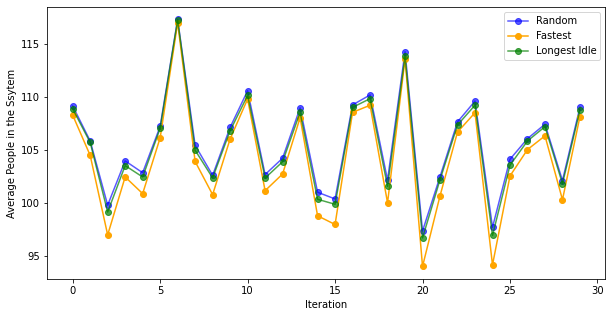

In [212]:
comparing_routing("Avg_People")

In [ ]:
comparing_routing("Waiting_Ti")

In [187]:
def barplot(measure):


    X = np.arange(1,31)
    fig = plt.figure()
    plt.figure(figsize=(10,5))

    plt.bar(X+0.0, matrix_r[measure], color = 'mediumaquamarine', width = 0.25, label = "Random" )
    plt.bar(X+0.25, matrix[measure], color = '0.45', width = 0.25, label = "Longest Idle" )
    plt.bar(X+0.5, matrix_i[measure], color = 'lightpink', width = 0.25,  label = "Fastest")

    plt.ylabel(measure, fontsize = 8)
    plt.xlabel("Iteration", fontsize = 8)
    plt.legend()

    plt.show()

skewness 

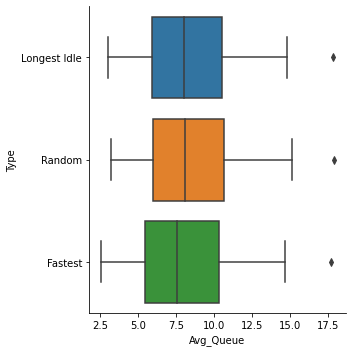

In [173]:
sns.catplot(x="Avg_Queue", y="Type", data=matrix_all, kind= "box")

Text(0.42499999999999716, 0.5, 'ASA')

<Figure size 432x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

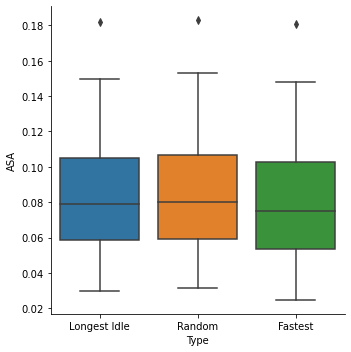

In [222]:
fig = plt.figure()
plt.figure(figsize=(8,4))
ax = sns.catplot(y="Waiting_Time_S", x="Type", data=matrix_all, kind= "box")
plt.ylabel("ASA", fontsize =  10)

In [ ]:
X = matrix_r[""]
fig = plt.figure()
plt.figure(figsize=(20,10))
ax = plt.subplot(111)

ax.plot(x, matrix_r[measure], label='Random')
ax.plot(x, matrix_i[measure], label='Fastest')
ax.plot(x, matrix[measure], label='Longest Idle')
    
plt.xlabel("Iteration", fontsize =  15)
plt.ylabel(measure, fontsize =  15)
ax.legend(fontsize = 15)
plt.show 